# Study on Games Sales

The goal of any business is to make a profit. Distribution of resources is also associated with profit: it makes sense to invest the resources of the enterprise in what brings it.
Online stores selling computer games are no exception. To get the biggest revenue, among the huge variety of games in the assortment, you need to include those with the highest popularity. Accordingly, such games should be included in the advertising campaign.
In this study, we will analyze historical data (up to 2016) from open sources, including game sales, user and expert ratings, genres and platforms. Data is needed to determine the patterns of success of the game. This will allow you to bid on a potentially popular product and plan advertising campaigns.

We will get the above data from the following csv file: '/datasets/games.csv'.

From the assignment, we know that these files contain the following metrics:

- Name - the name of the game
- Platform - platform
- Year_of_Release - year of release
- Genre - game genre
- NA_sales - sales in North America (millions of copies sold)
- EU_sales - sales in Europe (millions of copies sold)
- JP_sales - sales in Japan (millions of copies sold)
- Other_sales - sales in other countries (millions of copies sold)
- Critic_Score - Critics score (maximum 100)
- User_Score - user rating (maximum 10)
- Rating — rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

**The purpose of this study** is to test the following null hypotheses:
1. The average user scores of the Xbox One and PC platforms are equal;
2. The average user scores for the Action and Sports genres are equal.

According to the results of the analysis, the hypotheses will either be accepted or rejected in favor of alternative ones: accordingly, the average user scores of the Xbox One and PC platforms differ, and the average user scores of the Action and Sports genres differ.

**Research progress**:

We will try to test the above hypotheses based on the above gaming data. Since we do not have information about the format (except for the column names) and the quality of the data, before testing the hypotheses, we will review the data and pre-process it, as well as perform data discovery and statistical analysis: all this is necessary to avoid errors that may affect the conclusions.


Thus, this study will include the following steps:

* data overview
* data preprocessing
* data discovery and and statistical analysis
* testing hypotheses


## Обзор данных



In [54]:
import numpy as np  # importing numpy
import pandas as pd  # importing pandas
import os.path as path # importing os.path to handle file path
import seaborn as sns # importing seaborn for plotting
import matplotlib.pyplot as plt  # importing matplotlib for plotting
from scipy import stats as st # importing statistic functions

Let's make the first idea about the data. Beforwe viewing and analysis, we read the file in csv format, save it as dataframe, and also look at the first 10 lines. Next, using the info() method,  we will display general information about the table:


In [55]:
# reading the file and saving to df
try:
    base_path = 'games.csv'
    df = pd.read_csv(base_path) if path.exists(base_path) else pd.read_csv(f'/datasets/{base_path}') # checking the file path
    display(df.head(10))  # gettin firs 10 rows of the df
except:
     print('File not found') # if no path is correct, printing error message


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [56]:
df.info() # displaying general info on df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


At first glance, it is clear that the data contains some anomalies: non-optimized column names, as well as the data type in some of them does not correspond to the metric  meaning.
Next, let's check the dataset for full duplicates. If there are any, we will remove them, since duplicates may
distort the results of our study:


In [57]:
df.duplicated().sum() # checking df for explicit duplicates

0

There is not a single full duplicate in the present dataframe, therefore, each observation is unique.
Next, we will check each column of the table for missing values:


In [58]:
(df.isna().mean()) * 100 # displaying the % of NaN in each column

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

As we can notice, missing values are present in 6 out of 11 columns, and if in the first three of them the proportion of such values is extremely small ('name', 'year_of_release', 'genre'), then in the next three ('critic_score', 'user_score ', 'rating') it is critical: more than half and about 40%, respectively.


**Conclusions**
During the data overview, we identified the following anomalies: column names, data types that do not match the declared metrics, as well as missing values. In the next section of the study, we will have to eliminate / process all listed anomalies in order to maximize the quality of our study.


## Data Preprocessing and Anomalies Elimination
### Optimizing Column Names



So, we noticed earlier that not all column names are optimized. To improve the perception of the dataframe, we will bring the names of all columns to lower case:


In [59]:
df.columns = df.columns.str.lower() # putting all column names to lower case
df.head()  # visualizing the result

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Next, let's move on to the most delicate stage - the processing of missing values.



###  Processing Missing Values
So, we found out that the missing values are present in 6 columns. Three of them ('name', 'year_of_release', 'genre') have a very low percentage of missing values (between 0.12 and 1.6%), well below the 10% threshold. So we can just delete rows where column data values are missing.



In [60]:
df = df.query('name.notna() & year_of_release.notna() & genre.notna()')  # removing the rows where  'name', 'year_of_release', 'genre' are NaN
(df.isna().mean()) * 100  # checking the result


name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.453418
user_score         40.166626
rating             40.598395
dtype: float64

As for the next three columns, which are missing a significant amount of values, it makes sense to check whether there is a  relationship between such missing values:



In [61]:
df[df['critic_score'].isna()][['critic_score', 'user_score', 'rating']].head(25) # checking for the relation

,critic_score,user_score,rating
1,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
9,NaN,NaN,NaN
10,NaN,NaN,NaN
12,NaN,NaN,NaN
18,NaN,NaN,NaN
20,NaN,NaN,NaN
21,NaN,NaN,NaN
22,NaN,NaN,NaN


So, we can suppose that there is some relationship, that is, if there is no data in a cell of one of the three columns, in almost 100% of cases they will be absent in the corresponding two other cells of the same row.
What can explain the presence of these missing values? Since we know from the assignment that the dataframe is made up of data from different open sources over a large number of years, perhaps the data were not available in the original sources. Otherwise, a large number of missing values can be explained by technical failures when retrieving data.


Next, we will analyze the missing values in the 'rating' column, which has more than 40% of them. From the assignment, we know that this column implies which age group, according to the Entertainment Software Rating Board, a game fits for. Let's check the unique values of this column:



In [62]:
df['rating'].unique()  # displaying thecolumn unique values

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

So, we can notice that the data is uniquely categorical. In addition to missin values, they contain the value 'RP' (rating pending), which means that, in fact, there is no rating.
In this situation, we have nothing to rely on to fill in the missing values. On the other hand, their percentage
is very high, so we cannot remove the rows. Let's fill in the missing values of the 'rating' column with the string 'unknown' and check the result:



In [63]:
df['rating'].fillna('unknown', inplace=True) # filling in NaNs with the selected value
df['rating'].isna().mean()  # checking the result

0.0

Let's move on to the 'critic_score' column - the leader in the number of missing values (more than a half). From the assignment and data overview, we know that this variable is quantitative with a ceiling of 100 points, discrete. For this reason, it makes no sense to look at the unique values it takes in the dataframe. Naturally, in this case, as in the previous one, we cannot remove more than half of the rows from the dataframe, so we will leave them in the dataframe without further processing.


The last column with missing values is 'user_score' (over 40%). And this variable is quantitative with a ceiling of 10 points, but, unlike the previous one, it is continuous. At the same time, we know from the task that it contains 1 non-quantitative value - 'tbd'. Let's see how often it occurs:


In [64]:
len(df[df['user_score']=='tbd'])  # checking the value frequency in the column

2376

'tbd' means ' to be defined' or its synonyms, i.e. the score is yet to be given (possibly data is being collected and processed). Given this value, information is missing for more than half of the games.
Therefore, the logic applied to the 'user_score' column is the same as described above: there are too many missinmg values to be removed from the dataframe. For the same reason filling in with mean or median would deteriorate the analysis quality, therefore will will keep such missing values as they are.


In [65]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')  # changing data type in the selected column



As a result of this transformation, the 'tbd' values turned into 'NaN'. As in the case of the critics' scores, since there is no reason to choose any value to fill in the missing values, we will leave them without further processing.



In [66]:
df.isna().mean()  # checking the NaN processing result


name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.546157
rating             0.000000
dtype: float64

The missing values have been processed, let's move on to changing the data type in the columns that have not been yet affected.


### Changing Data Types
From the the data overview, it became clear that the data in terms of the columns did not correspond to the declared metric. We will process each such a case by converting the data type.
We are talking about the columns 'year_of_release' and 'critic_score', in both the actual data type is float, and the expected data type is integers. And if things are pretty clear over the years, as far as critic scores are concerned, unlike user ratings, there are no fractional ratings in this column, so it makes sense to reduce them to whole numbers.


In [67]:
for col in ['year_of_release', 'critic_score']:  # iterating the list of columns
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64') # changing the data type to int
df.info(10)  # visualizing the result


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


The data in the dataframe have been processed, now we will add some calculated features.


### Adding Calculated Features
As we know from the task, the table contains data on sales of games by region. Let's add a column to the table that will show the total sales for each game worldwide:



In [68]:
df['total_sales'] = df['eu_sales'] + df['na_sales'] + df['jp_sales'] + df['other_sales']# adding a column with global sales


**Conclusions**
In the course of data preprocessing, we optimized the column names, processed missing values, and also changed the type of some data to match the metrics. All  these conversions should have cleared as much as possible
dataframe and improved its quality.
Now we have everything we need to conduct data discovery and statistical analysis, as well as hypothesis testing.



## Data Discovery and Statistical Analysis

From the task, we know that the data in the dataframe has been collected over several years. To assess whether we need the whole period to plan an advertising campaign for 2017, let's group and sort the dataframe by year:



In [69]:
games_by_year = df.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index() # creating a pivot table on the years
games_by_year.rename(columns={'name': 'number_by_year'}, inplace=True) # renaming a column
games_by_year.head(37) # visualizing the game amount per year


,year_of_release,number_by_year
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Let's visualize the result for a better understanding:

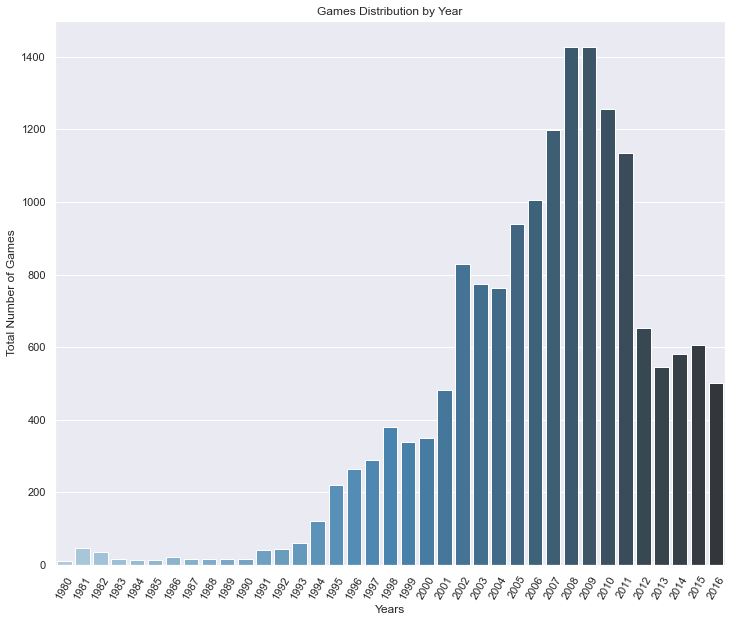

In [70]:
ax = sns.barplot(x='year_of_release', y='number_by_year', data=games_by_year, palette="Blues_d")  # plotting a barplot on the amount of games per year
sns.set(rc = {'figure.figsize':(12,10)}) # setting the plot dimensions
ax.set_ylabel("Total Number of Games") # settng a lable for y axis
ax.set_xlabel("Years") # settng a lable for x axis
ax.set_xticklabels(ax.get_xticklabels(),rotation=60) # rotating ticks titles on the x axis
ax.set_title('Games Distribution by Year'); # setting the plot title


По результатам группировки можно заметить, что все охваченные годы (с 1980 по 2016) можно разделить на несколько периодов, в зависимости от количества выпускаемых игр: 1980-1994, 1995-2001, 2002-2004, 2005-2011, 2012-2016.
Несмотря на ожидания, пик выхода новых игр приходится не на последние годы, а на период с 2005 по 2011 гг, после чего выпуск игр падает почти в два раза. 

Next, let's look at how sales have been changing by platform. Let's choose platforms with the highest total sales:



In [71]:
sales_by_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales').reset_index()  # creating a pivot table
sales_by_platform.head(31) # displaying the global sales per platform


,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


Let's visualize the result with a barplot:

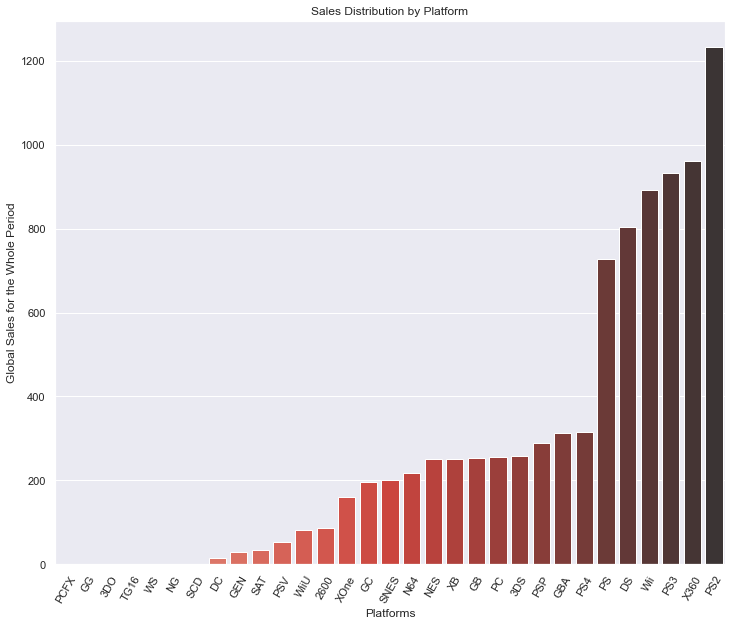

In [72]:

ax = sns.barplot(x='platform', y='total_sales', data=sales_by_platform, palette="Reds_d")  # plotting a barlop om globals sales divided by platform
sns.set(rc = {'figure.figsize':(12,10)}) # setting the plot dimensions
ax.set_ylabel("Global Sales for the Whole Period") # settng a lable for y axis
ax.set_xlabel("Platforms") # settng a lable for x axis
ax.set_xticklabels(ax.get_xticklabels(),rotation=60) # rotating ticks titles on the x axis
ax.set_title('Sales Distribution by Platform'); # setting the plot title

Further we will sales distribution over the years for top-5 platforms, i.e. PS2, X360, PS3, Wii, DS:

In [73]:
top_5 = df.query('platform in ["PS2", "X360", "PS3", "Wii", "DS"]').pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')  # creating a separate df with top 5 platforms
top_5.head(18)  # visualizing the result


platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
1985,0.02,NaN,NaN,NaN,NaN
2000,NaN,39.17,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN
2002,NaN,205.38,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN
2004,17.27,211.81,NaN,NaN,NaN
2005,130.14,160.66,NaN,NaN,8.25
2006,119.81,103.42,20.96,137.15,51.62
2007,146.94,75.99,73.19,152.77,95.41


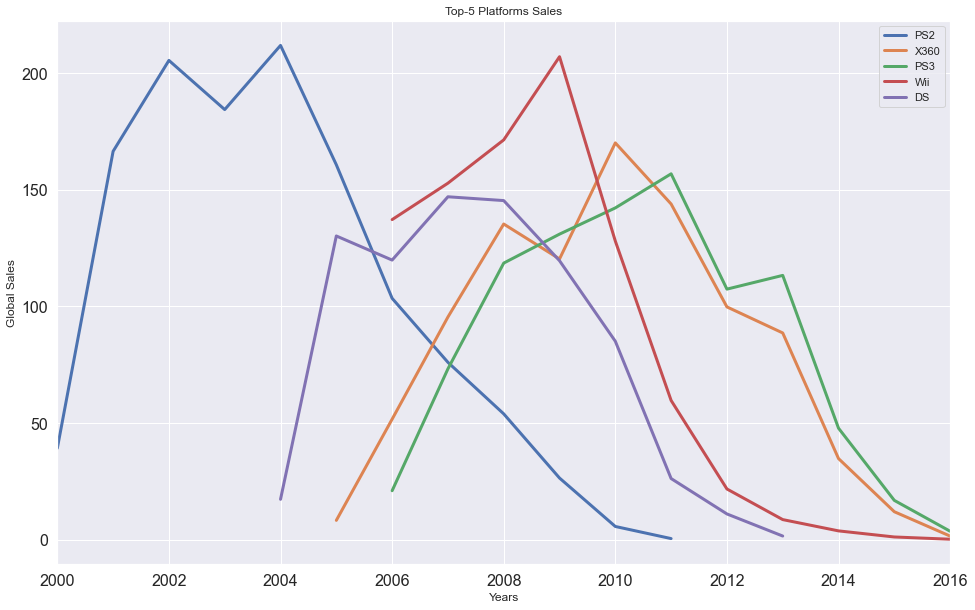

In [74]:
for i in ["PS2", "X360", "PS3", "Wii", "DS"]:  # iterating the columns
    ax = top_5[i].plot(legend=True, figsize=(16,10), lw=3, fontsize=16, grid=True)  # plotting distribution for each during the years
    ax.set_ylabel("Global Sales") # settng a lable for y axis
    ax.set_xlabel("Years") # settng a lable for x axis
    ax.set(xlim=(2000, 2016)) # setting min and max values on the x axis
    ax.set_title('Top-5 Platforms Sales'); # setting the plot title

After analyzing the distributions above, we can deduce that the "lifetime" of platforms (the period when new ones appear and old ones disappear) is approximately 10-11 years. At the beginning of this period, platform sales rise, reach peak or peaks at the midpoint, and then decline.



Taking into account the data on the games release, we will choose the period from 2012 to 2016 as the relevant period. This period provides a sufficient number of observations, includes the last cycle in terms of game release volume.
Let's select the data for the selected period in a separate dataframe:



In [75]:
relevant_data = df.query('2012 <= year_of_release <= 2016') # creating a separate df with the data referred to the relevant period
relevant_data.head(15) # visualizing the result

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,unknown,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78,7.2,E,9.90


Next, we should determine which platforms are leading in sales, rising or falling. To do that, let's plot the once again total sales distribution:



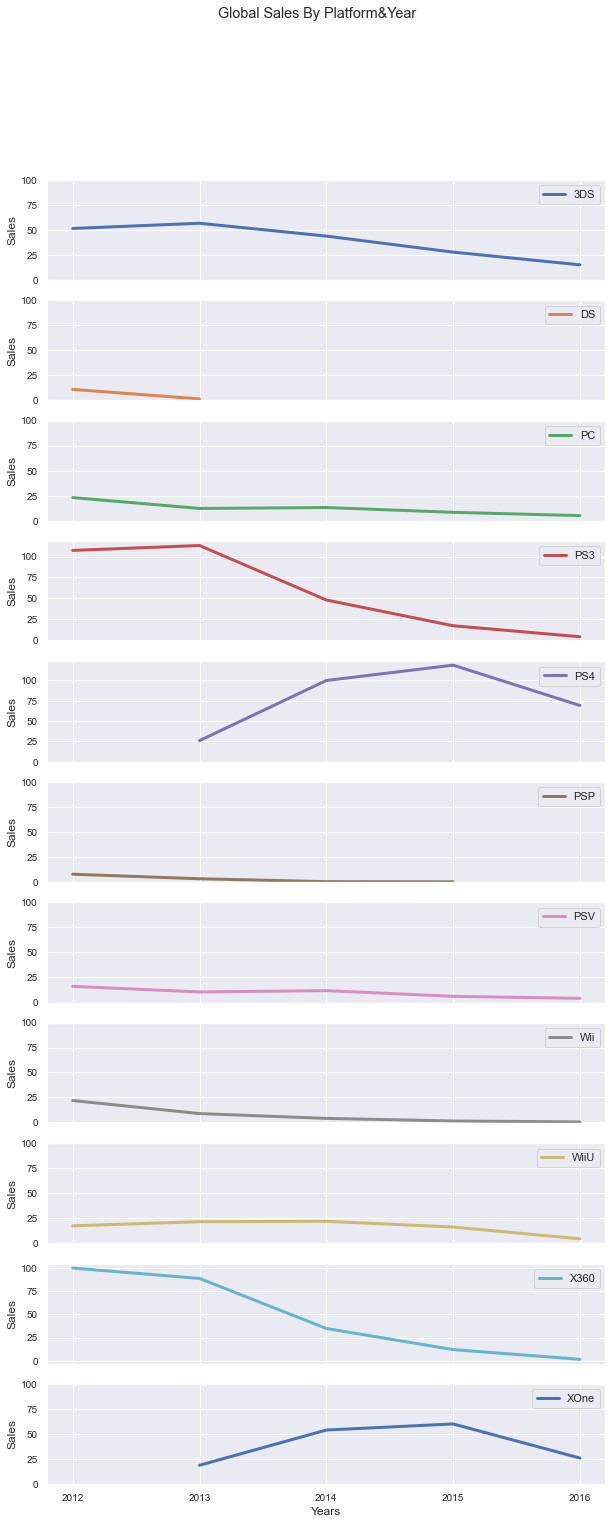

In [76]:
ax =  relevant_data.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum').plot(subplots=True, legend=True, xticks=[2012, 2013, 2014, 2015, 2016], yticks=[0, 25, 50, 75, 100], figsize=(10, 24), lw=3, fontsize=10, grid=True, title='Global Sales By Platform&Year', xlabel='Years', ylabel='Sales'); # plotting sales distribution for each platform


From the assignment, we know that the data for 2016 is incomplete, so the drop in sales compared to 2015 is most likely illusory.
Based on the above of global sales distributions, some platforms simply do not exist in 2016 (their sales are 0), for example, XB, GC, GBA, DS, PS2. Others are approaching the end of their life cycle or are in decline after the peak: X360, Wii, PSP, PS3, PC.
Potentially interesting platforms for us, on which, from a business point of view, we should bet, and in whose advertising campaign it is worth investing, are those that have appeared relatively recently, and for which we observe a positive trend in global sales (sales themselves should be at a high level). Based on the trends such platforms are XOne, PS4. As for the 3DS - more likely no than yes, as there has been a downward trend in sales since 2013.



Next, we will plot a boxplot on global game sales from the relevant data broken down by platform.

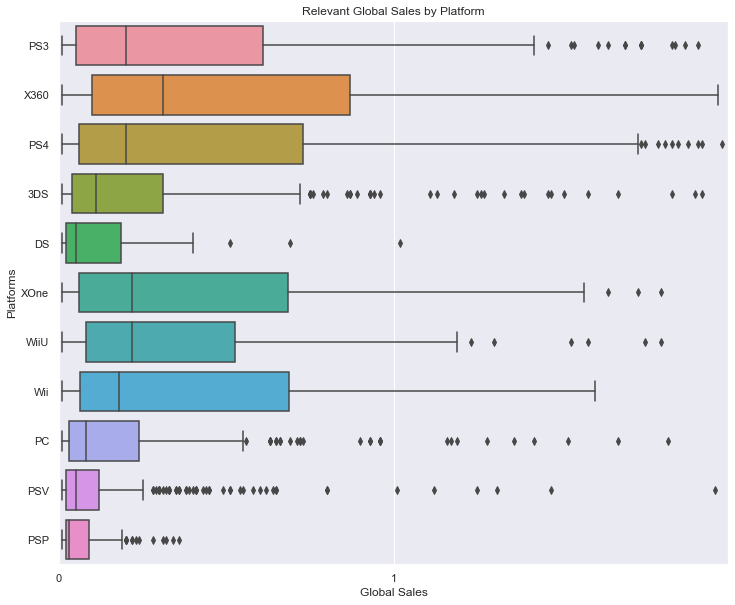

In [77]:
ax = sns.boxplot(data=relevant_data, x='total_sales', y='platform') # plotting a boxplot on the platform sales
sns.set(rc = {'figure.figsize':(24, 24)}) # setting the plot dimensions
ax.set_xticks(range(0, 2, 1))  # setting ticks intervals on x axis 
ax.set_xticklabels(range(0,2, 1))  # setting ticks values on x axis
plt.xlim([0,2]);  # setting min and max values on x axis
ax.set_ylabel("Platforms") # settng a lable for y axis
ax.set_xlabel("Global Sales") # settng a lable for x axis
ax.set_title('Relevant Global Sales by Platform'); # setting the plot title

As we can see from the boxplot, there is a large number of outliers for almost every platform: this is due to the fact that not all games are sold in the same way, there are bestsellers whose global sales have reached more than 80 million copies, but such games are just rare and outlier values, since the median of the absolute majority of platforms is 0.1-0.3 million copies. PS3, PS4, XOne, X360 have the best performance in global sales: on these platforms, sales of 1.7 million still fall into the "mustache" range, therefore, they are not so rare.



Considering the range of the data, we should analyze the mean, variance, and standard deviation of global sales for each platform. Since our data is a population sample, when calculating the variance and standard deviation, the parameter ddof=1 should be used, which is the default value in pandas built-in methods.



In [78]:
sales_stats_by_platform = relevant_data.pivot_table(index='platform', values='total_sales', aggfunc=['mean', 'var', 'std']).reset_index()  # creating a pivot tables with the stats
sales_stats_by_platform.columns = ["_".join((j,i)).strip() for i,j in sales_stats_by_platform.columns] # modifiying the column names
sales_stats_by_platform.head(16)  # visualizing the result

,_platform,total_sales_mean,total_sales_var,total_sales_std
0,3DS,0.491439,1.924217,1.387161
1,DS,0.404839,2.071426,1.439245
2,PC,0.250600,0.244669,0.494640
3,PS3,0.585781,2.139946,1.462855
4,PS4,0.801378,2.590350,1.609456
5,PSP,0.064682,0.005083,0.071296
6,PSV,0.119659,0.041214,0.203011
7,Wii,0.655000,1.358267,1.165447
8,WiiU,0.559116,1.121133,1.058836
9,X360,0.810068,2.931181,1.712069


Despite our expectations after the boxplot, averages across all platforms are in the range of 1 million copies and below.
With regard to variance and standard deviation, we know that these statistics are interrelated (standard deviation is the square root of the variance), so to analyze the dispertion of values around the mean, it is enough to analyze one of them. We see the highest standard deviation among the top sellers during the relevant period for PS3, PS4, X360, as well as 3DS, DS. DC has the lowest dispertion, as do their mean and global sales.



Next, we will check how the reviews of experts and ordinary users affect the global sales of platforms. Let's visualize a similar relationship using a scatterplot, where the x-axis will be plotted by the scores of users and critics, respectively, and the y-axis will be the global sales. As an example, let's choose one of the popular platforms, e.g. PS3:



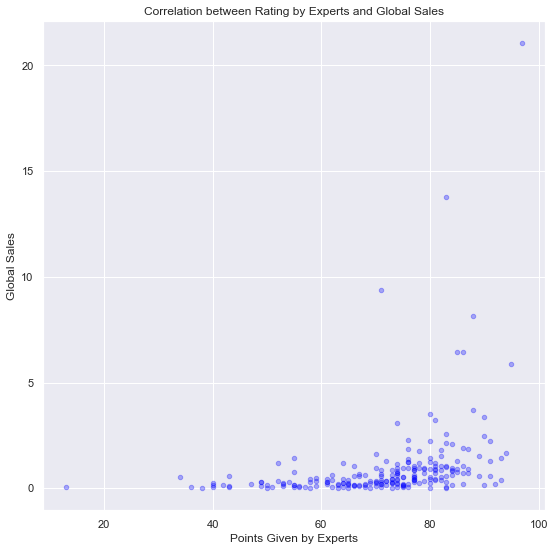

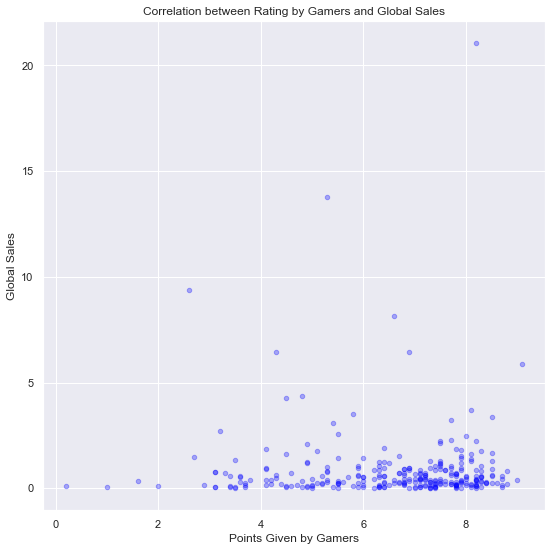

In [79]:
ax1 = relevant_data.query('platform=="PS3"').plot(x='critic_score', y='total_sales', kind='scatter', color='blue', grid=True, alpha=0.3, figsize=(9,9), title='Correlation between Rating by Experts and Global Sales', xlabel='Points Given by Experts', ylabel='Global Sales') # plotting a scatter plot for the selected column 
ax2 = relevant_data.query('platform=="PS3"').plot(x='user_score', y='total_sales', kind='scatter', color='blue', grid=True, alpha=0.3, figsize=(9,9), title='Correlation between Rating by Gamers and Global Sales', xlabel='Points Given by Gamers', ylabel='Global Sales')  # plotting a scatter plot for the selected column    

Both plots clearly show some relation, especially between critics' ratings and sales, the higher the scores are, the higher the game's sales are for the platform.
Let's check the conclusions by calculating the correlation coefficient between these metrics:



In [80]:
relevant_data.query('platform=="PS3"')[['total_sales', 'critic_score', 'user_score']].corr() # calculating correlation for the selected columns

,total_sales,critic_score,user_score
total_sales,1.000000,0.331497,-0.005144
critic_score,0.331497,1.000000,0.539456
user_score,-0.005144,0.539456,1.000000


The calculated correlation coefficient confirms our conclusions: there is a direct correlation between critics' scores and global sales, it is about 0.3: not the strongest, but, nevertheless, it is there.
At the same time, the correlation between sales and user ratings, on the contrary, is negative, but very weak (less than -0.01).
It is worth noting the high correlation between the scoress of users and critics (more than 0.5): apparently, opinions often coincide, and if the rating of critics is high, in 54% of cases it will also be high among gamers, and vice versa.



Next, we will check whether these conclusions are valid for all other platforms in general. We plot the relative scatterplot and calculate the correlation coefficients:



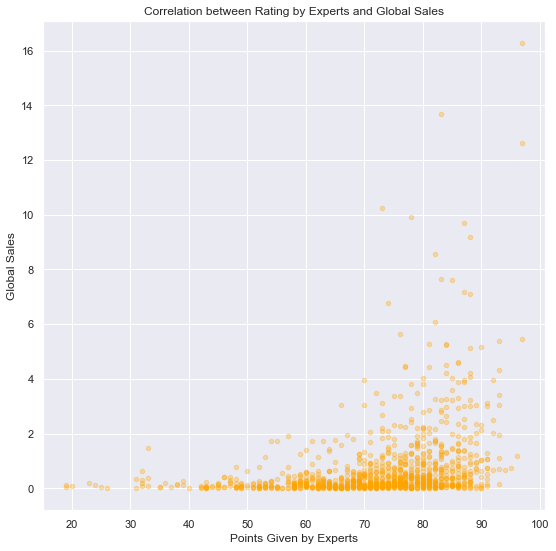

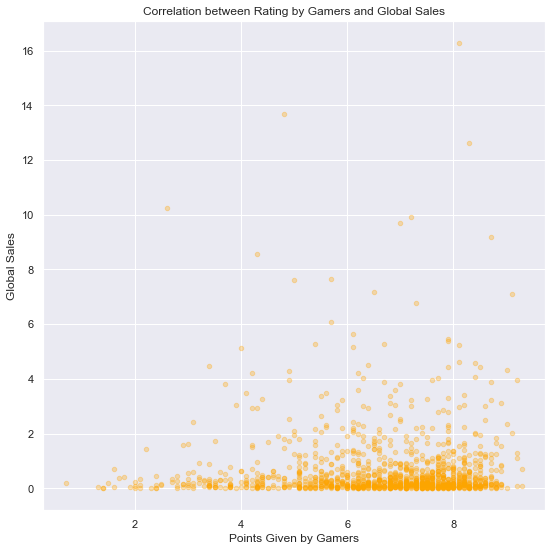

In [81]:
ax1 = relevant_data.query('platform!="PS3"').plot(x='critic_score', y='total_sales', kind='scatter', color='orange', grid=True, alpha=0.3, figsize=(9,9), title='Correlation between Rating by Experts and Global Sales', xlabel='Points Given by Experts', ylabel='Global Sales') # plotting a scatter plot for the selected column  
ax2 = relevant_data.query('platform!="PS3"').plot(x='user_score', y='total_sales', kind='scatter', color='orange', grid=True, alpha=0.3, figsize=(9,9), title='Correlation between Rating by Gamers and Global Sales', xlabel='Points Given by Gamers', ylabel='Global Sales')  # plotting a scatter plot for the selected column 

In [82]:
relevant_data.query('platform!="PS3"')[['total_sales', 'critic_score', 'user_score']].corr() # calculating correlation for the selected columns


,total_sales,critic_score,user_score
total_sales,1.000000,0.307659,0.009781
critic_score,0.307659,1.000000,0.512974
user_score,0.009781,0.512974,1.000000


So, for other platforms, there is also a certain direct relation between global sales and scores, but it is weaker: the correlation coefficient of global sales and critic scores is about 0.3, while global sales and user scores are extremely low: it does not even reach 0.01.
The reason for the lower correlation cannot be pinpointed with certainty: possibly due to platform aggregation, including the most unpopular, for which the sales are low, there were games with a high rating.
At the same time, the correlation between the scores of users and critics, as in the case of a single PS3 platform, is high.



Next, we will analyze how genres and global game sales correlate, and whether there is a difference in sales depending on the genre. To do this, we will plot a bar chart:



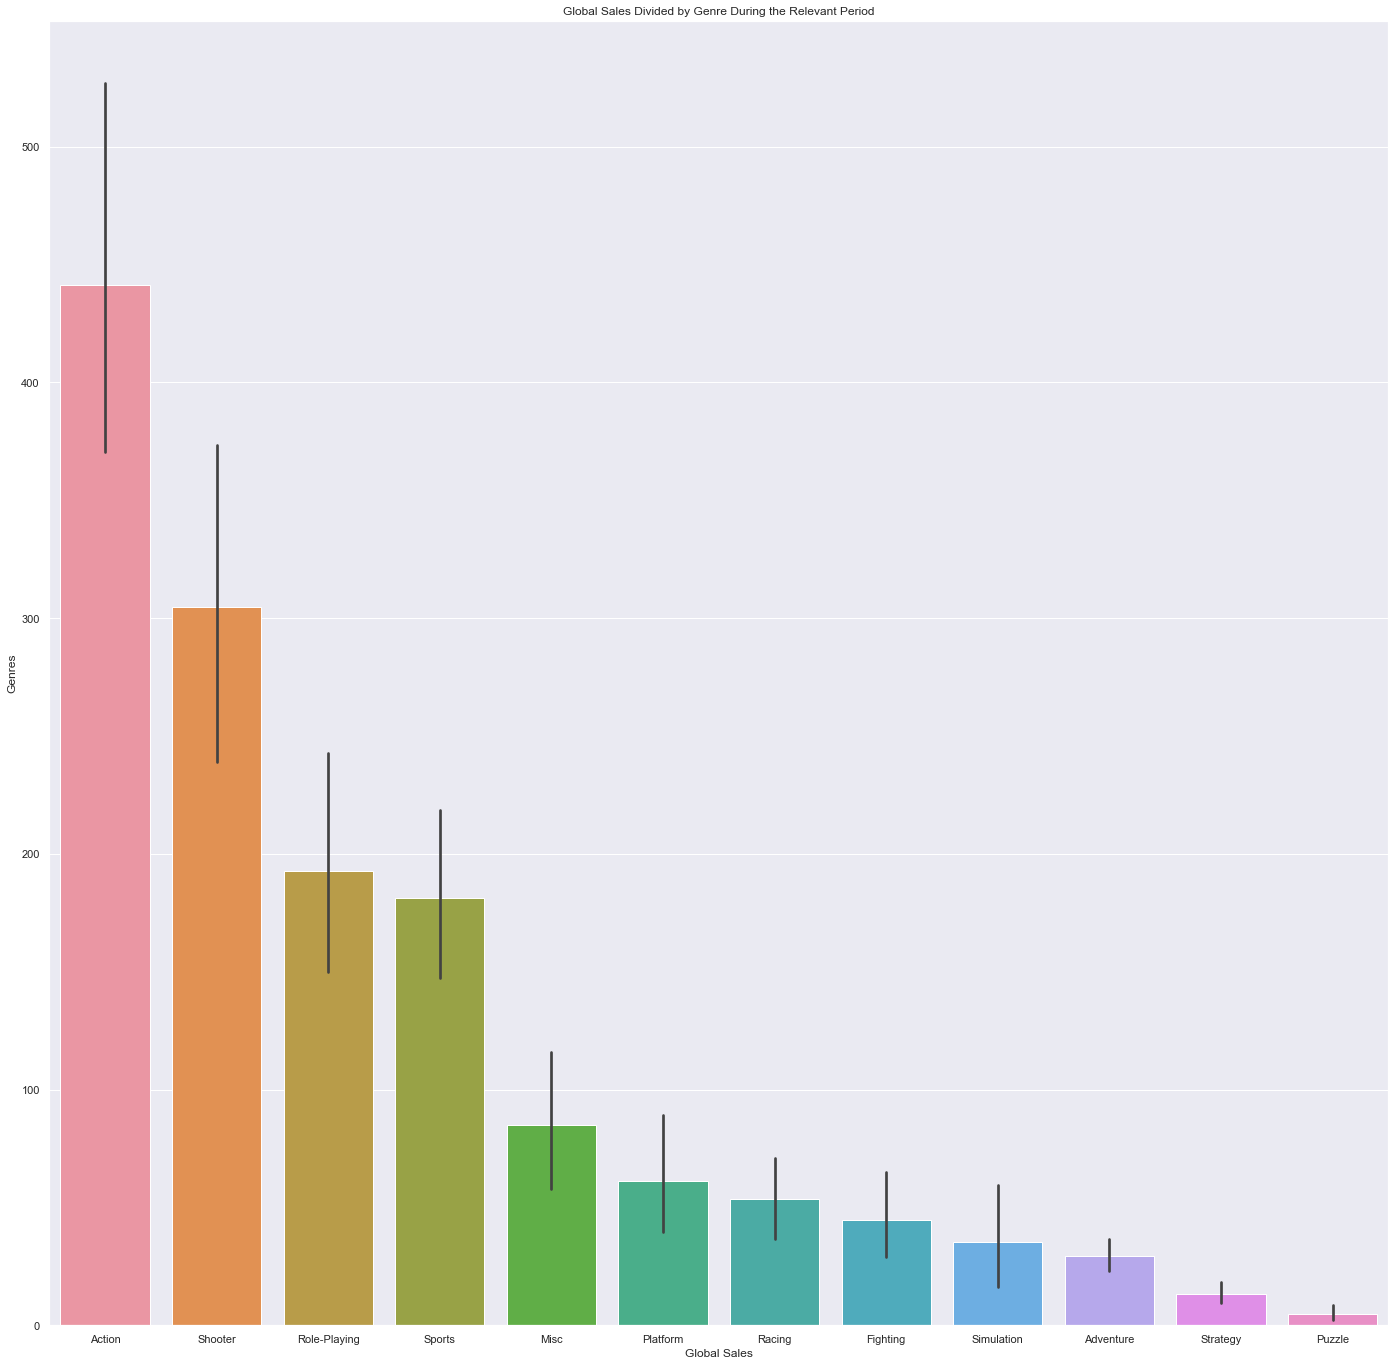

In [83]:
sorted_genres = relevant_data.pivot_table(index='genre', values='total_sales', aggfunc=sum).reset_index().sort_values(by='total_sales', ascending=False) # creating a pivot table on genresп sorting by global sales
order = sorted_genres['genre'] # setting an order to pass as parameter
ax = sns.barplot(x='genre', y='total_sales', estimator=sum, data=relevant_data, order=order)  # plotting a barplot on global sales divided by genre
sns.set(rc = {'figure.figsize':(10,8)}) # setting the plot dimensions
ax.set_ylabel("Genres") # settng a lable for y axis
ax.set_xlabel("Global Sales") # settng a lable for x axis
ax.set_title('Global Sales Divided by Genre During the Relevant Period'); # setting the plot title


From the plot, we can clearly see that sales among game genres are unevenly distributed. The top three are
action games, shooting games take the second place, and role-playing games close the podium. As for outsiders, puzzles are the least sold in the world, gamers like strategies a little more, and, finally, the adventure genre occupies the third place from the bottom.



Next, we will try to create a user portrait depending on the region. To do this, for each of them (NA, EU, JP), we will identify the 5 most popular platforms and genres of games.
Let's start with the top 5 gaming platforms:



In [84]:
platforms_na = relevant_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False) # creating a separate df with NA sales
platforms_na.head(5) # displaying top 5

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

In [85]:
platforms_eu = relevant_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)  # creating a separate df with EU sales
platforms_eu.head(5)  # displaying top 5

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

In [86]:
platforms_jp = relevant_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)  # creating a separate df with JP sales
platforms_jp.head(5)  # displaying top 5

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

Based on sales by platform in 3 selected regions, we can see the following: everywhere in the top 5, occupying different places, there are PS3 and PS4. At the same time, in Europe and North America, all 5 most popular platforms are the same, but gamers from Japan have other preferences: the top five also includes 3DS and PSV, which do not lead the others regions.
Next, we highlight the favorite genres depending on the continent:



In [87]:
genres_na = relevant_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)  # creating a separate df with NA sales
genres_na.head(5)  # displaying top 5

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

In [88]:
genres_eu = relevant_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)  # creating a separate df with EU sales
genres_eu.head(5)  # displaying top 5

genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

In [89]:
genres_jp = relevant_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)  # creating a separate df with JP sales
genres_jp.head(5)  # displaying top 5

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

As far as it concerns genres, the dynamics are similar to platforms. Gamers from Europe and North America have more in common: both prefer action games first, then shooting games, and finally sports games. In Japan, action is already descending to 2nd place, the leader is role-playing games.


Next, let's check whether the ESRB rating, that is, the categorization of games by age groups, affects sales in a particular region, for this we will group sales in each of the regions according to the available ESRB categories:



In [90]:
rating_na = relevant_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)  # creating a separate df with NA sales
rating_na.head(5)  # displaying top 5

rating
M          231.57
E          114.37
unknown    103.31
E10+        75.70
T           66.02
Name: na_sales, dtype: float64

In [91]:
rating_eu = relevant_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)  # creating a separate df with EU sales
rating_eu.head(5)  # displaying top 5

rating
M          193.96
E          113.03
unknown     91.50
E10+        55.37
T           52.96
Name: eu_sales, dtype: float64

In [92]:
rating_jp = relevant_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)  # creating a separate df with JP sales
rating_jp.head(5)  # displaying top 5

rating
unknown    108.84
E           28.33
T           26.02
M           21.20
E10+         8.19
Name: jp_sales, dtype: float64

As for the sales ratio and ESRB rating, in this case, the leading age categories are completely the same
in North America and Europe. At the same time, in both regions, the game with an unknown rating is in third place in terms of sales. As far as Japan is concerned, such games are in the first place by a decisive margin.
Referring to the ESRB website, we can find a transcript for each category:

* E - "For all";
* T - "Teenagers";
*  M - "For adults";
*E10+ - "For everyone from 10 years and older";
* K-A - "For everyone", then replaced by E.
* AO - "Adults Only"

As for the influence of the rating on sales in a particular region, this ratio cannot be called "influence", but rather a correlation: the age category of the game is an objective characteristic. In the first place in Europe and America are games for adults, possibly with scenes of violence, which is typical for the action genre, which is also among the leaders. It is followed by games for which there are no age restrictions: available for everyone - everyone buys. It is also logical, for example, that we see games for teenagers among the top sellers: this is one of the target audiences for game creators, since due to age and free time availability, in most cases it is teenagers who play computer games.
A separate issue is the category of unrated games, which ranks first in Japan by a wide margin. If these games basically do not have a rating, that is, there are no age restrictions, then we can say that it is logical that many users buy such games, they are available to everyone. Instead, in case a game has a rating, but it is not in our dataset, the situation with the real distribution of sales and the impact of the rating on sales is unpredictable.



**Conclusions**
So, we have conducted a data discovery and a statistical analysis of the data presented for the identified relevant period: we considered the distribution of games by years, global sales by platforms, analyzed the statistics (median, mean, standard deviation) of global sales, calculated the correlation between sales and scores, described user behavior depending on the region of residence. We have a fairly clear picture of the platforms and genres of games that bring more revenue.
Let's move on to the last stage of our project - testing hypotheses about the absence of a difference between the individual categories of the sample.


## Hypothesis Testing

Ideally, to test our hypotheses, we would compare the means of  user score populations for the Xbox One and PC platforms and the Action and Sports genres, respectively. However, the data at our disposal are not global, their volume varies from year to year. For this reason, we will divide the dataset for the relevant period into appropriate subgroups and compare the  samples means using a t-test.

First, let's test the first pair of hypotheses:
 - H0: The average user scores of the Xbox One and PC platforms are equal;
 - H1: The average user scores of the Xbox One and PC platforms differ.
 
 Let's separate data on user scores for two selected platforms into separate dataframes.



In [93]:
xone_user_rating = relevant_data.query('platform=="XOne"')['user_score'].dropna()  # creating a df for Xbox One
xone_user_rating.head(10) # visualizing the result


165    7.9
179    5.4
242    6.4
270    6.2
373    4.1
398    5.5
413    7.5
417    4.4
422    7.2
484    6.4
Name: user_score, dtype: float64

In [94]:
pc_user_rating = relevant_data.query('platform=="PC"')['user_score'].dropna()  # creating a df for РС
pc_user_rating.head(10) # visualizing the result

192     4.0
458     3.9
688     7.9
959     4.8
1095    7.9
1227    4.2
1351    2.2
1437    6.0
1530    5.4
1730    7.9
Name: user_score, dtype: float64

Our task is to compare the means of two independent populations based on the samples taken from them, so we will use the scipy.stats.ttest_ind() method, where the equal_var = False parameter, since the samples are of different sizes and there is no certainty that their variances are equal.


In [95]:
alpha = 0.05 # setting a significance level
results = st.ttest_ind(xone_user_rating, pc_user_rating, equal_var = False) #  testing the hypotesis on equality of two independent populations means
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-значение: 0.5489537965134912
Failed to reject the null hypothesis


So, the p-value obtained as a result of the Student's test is significantly greater than the given level of statistical significance, thus, we can definitely accept the null hypothesis, which means that **the average user scores of the Xbox One and PC platforms are equal.**



Next, we will test the second pair of hypotheses:
* H0: The average user scores for the Action and Sports genres are equal.
* H1: The average user scores for the Action and Sports genres are different.

To do this, we will make two selections from the available data depending on the genre:



In [96]:
action_user_rating = relevant_data.query('genre=="Action"')['user_score'].dropna()  # creating a df for Action genre
action_user_rating.head(10) # visualizing the result

16     8.2
23     8.1
42     8.3
81     6.6
127    6.9
149    9.1
165    7.9
176    6.7
190    6.1
231    8.1
Name: user_score, dtype: float64

In [97]:
sports_user_rating = relevant_data.query('genre=="Sports"')['user_score'].dropna()  # creating a df for Sports genre
sports_user_rating.head(10) # visualizing the result

77     4.3
94     5.0
126    4.3
143    5.7
264    4.5
271    4.2
314    6.7
417    4.4
420    5.9
469    6.3
Name: user_score, dtype: float64

In [98]:
alpha = 0.05 # setting a significance level
results = st.ttest_ind(action_user_rating, sports_user_rating, equal_var = False) # testing the hypotesis on equality of two independent populations means
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-значение: 4.24307776572644e-20
Rejecting the null hypothesis


The p-value is extremely low: it means that the probability of getting the same means in both populations
is also low. Thus, we reject the null hypothesis: **Average user scores for the Action and Sports genres are different.**


## Study Results
In the course of this study, we processed and analyzed the dataset.
We've been able to track game releases year by year since 1985, identifying the platforms with the highest sales (PS2, X360 and PS3), but given the platform life cycle (10-11 years), we found that none of them , being in the last phase of the life cycle, is worth the advertising investment. In terms of advertising budget, the most interesting platforms are XOne and PS4.
Taking into account the distribution of sales by years, we set the relevant period for forecasts for 2017, which is, from 2012 to 2016, and further used the data sample only for this period.
In addition, we were able to prove that, for example, we should not rely on user score: the correlation between user score and sales is extremely low. Regarding the expert assessments, both in the particular and in the general case, we found a fairly high positive correlation. However, relying on it makes sense only if we have confidence that the games were not evaluated by experts afterwards.
We have determined that across all regions it is worthwhile to invest advertising resources in the top-selling genres: action, shooters, sports and role-playing games. However, when selling worldwide, depending on the region, it is worth adjusting the budget in one direction or another. For example, in Japan it makes sense to promote all kinds of role-playing games.
In the same region, you can ignore the presence of the ESRB rating.

Next, we tested two null hypotheses:
1. The average user scores of the Xbox One and PC platforms are equal.
This hypothesis has been accepted based on the results of the t-test.
2. The average user scores for the Action and Sports genres are equal.
This hypothesis, based on the results of the t-test, has been rejected in favor of an alternative one.

From the classical statistics point of view, the conclusions that we came to from the results of hypothesis testing are quite reliable: the number of elements in each of the subsamples formed from the available data from the general populations of all games was more than 30 observations. The result would have certainly been more accurate if we had tested it on several samples of a similar size from the general
populsations, and not just one. 